# Exercise 10: Generative Networks

In [61]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [2]:
# Use built-in Pytorch function to download MNIST data in usable format 
# the images are automatically normalised to a mean of zero and sigma of 1 

batch_size = 100

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('.', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,)) # initial mean and width
                             ])),
  batch_size=batch_size, shuffle=True)


torch.Size([100, 1, 28, 28])


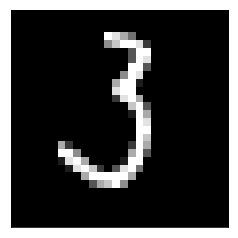

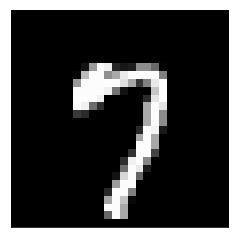

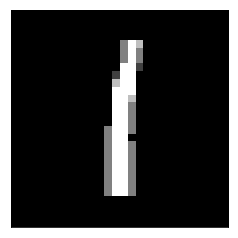

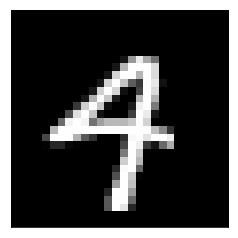

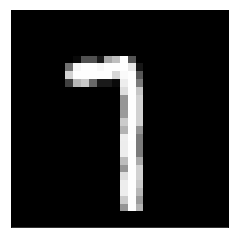

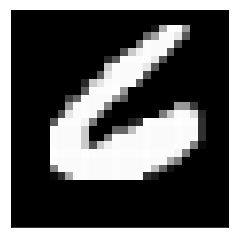

In [6]:
# Helper function to draw MNIST image
# expect a 2D tensor as input
def draw_image(im):
    plt.imshow(im, cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.show()


examples = enumerate(train_loader)
for batch_idx, (example_data, example_targets) in examples:

    # First print the shape of the example_data tensor
    print(example_data.shape) # 100 examples, 1 color, 28x28 pixel images
    
    # Show the first 6 images
    for i in range(6):
        draw_image(example_data[i][0])
        

    break # Abort the loop over the input data

In [62]:
# A few useful functions

# Produce random numbers as input for generator
# torch.randn produces random numbers following 
# a Gaussian with mean=0 and sigma=1
def noise(size):
    return torch.autograd.Variable(torch.randn(size, 100))

# Translate images to flat vectors (784 = 28*28)
def images_to_vectors(images):
    return images.view(images.size(0), 784)

# Translate flat vectors to images in the format (color, vertical, horizontal)
def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 1, 28, 28)

# Homework


Implement two networks, named `discriminator` and `generator` (the exact names are important so the subsequent code picks them up correctly). The Discriminator network should receive an input list with 784 features and have one output node. As it does binary discrimination between real and fake images, using a sigmoid for the last layer is recommended. The generator should receive 100 input features (random numbers) and produce a final output of length 784 (28 times 28). Using `tanh` as activiation function for the final layer might be useful. Using the code below, see what image generation results you can acvieve

Produce ten example image after training has completed.

In [63]:

class DiscriminatorNet(torch.nn.Module):

    def __init__(self):
        super(DiscriminatorNet, self).__init__()        

        self.sigmoid = nn.Sigmoid()
        self.lrelu = nn.LeakyReLU(0.2)
        self.dropout = nn.Dropout(0.3)
        
        self.dense1 =  nn.Linear(784, 1024)
        self.dense2 =  nn.Linear(1024, 512)
        self.dense3 =  nn.Linear(512, 256)
        self.dense4 =  nn.Linear(256, 1)
        
                                
    def forward(self, x):

        x = self.dropout(self.lrelu(self.dense1(x)))
        x = self.dropout(self.lrelu(self.dense2(x)))
        x = self.dropout(self.lrelu(self.dense3(x)))
        x = self.sigmoid(self.dense4(x))

        return x
    
discriminator = DiscriminatorNet()

class GeneratorNet(torch.nn.Module):
    """
    A four hidden-layer generative neural network
    """
    def __init__(self):
        super(GeneratorNet, self).__init__()        

        self.tanh = nn.Tanh()
        self.lrelu = nn.LeakyReLU(0.2)

        self.dense1 =  nn.Linear(100, 256)
        self.dense2 =  nn.Linear(256, 512)
        self.dense3 =  nn.Linear(512, 1024)
        self.dense4 =  nn.Linear(1024, 784)
                    
    def forward(self, x):

        x = self.lrelu(self.dense1(x))
        x = self.lrelu(self.dense2(x))
        x = self.lrelu(self.dense3(x))
        x = self.dense4(x)


        return x
generator = GeneratorNet()

# We need two optimisers, one for the generator, one for the discriminator network
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0002,betas=(0.5, 0.999))
g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002,betas=(0.5, 0.999))

loss = nn.BCELoss() # Binary cross entropy loss function

Epoch: 0, Batch: 0, Error D: 1.3587510585784912, Error G: 0.6789534091949463


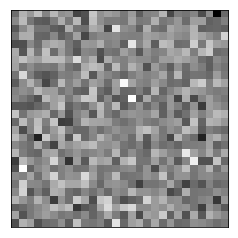

Epoch: 0, Batch: 500, Error D: 0.2262989580631256, Error G: 4.84857177734375


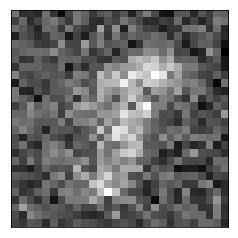

Epoch: 1, Batch: 0, Error D: 0.21221601963043213, Error G: 6.175994396209717


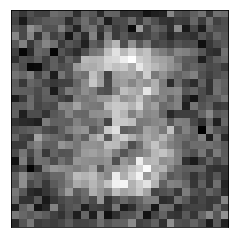

Epoch: 1, Batch: 500, Error D: 0.25420767068862915, Error G: 5.9968461990356445


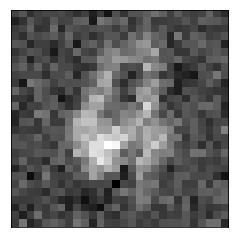

Epoch: 2, Batch: 0, Error D: 0.35784798860549927, Error G: 6.966495990753174


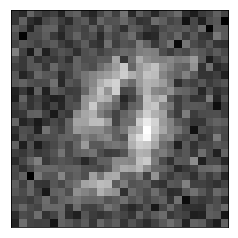

Epoch: 2, Batch: 500, Error D: 0.414189875125885, Error G: 7.672125816345215


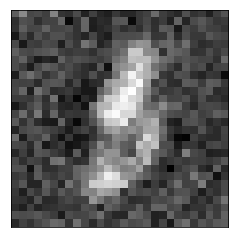

Epoch: 3, Batch: 0, Error D: 0.25036299228668213, Error G: 4.350992202758789


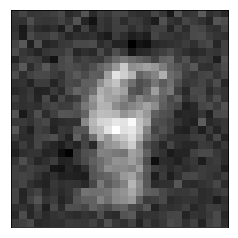

Epoch: 3, Batch: 500, Error D: 0.28427040576934814, Error G: 5.332677841186523


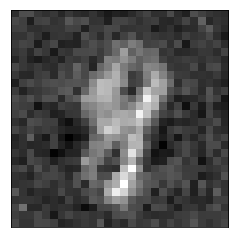

Epoch: 4, Batch: 0, Error D: 0.2855491638183594, Error G: 6.014540195465088


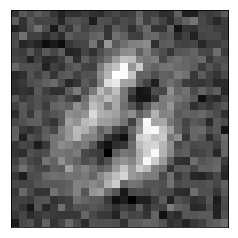

Epoch: 4, Batch: 500, Error D: 0.34336233139038086, Error G: 5.533667087554932


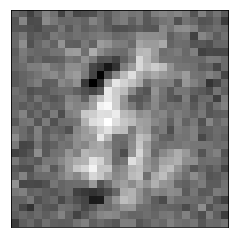

Epoch: 5, Batch: 0, Error D: 0.3859925866127014, Error G: 3.267033338546753


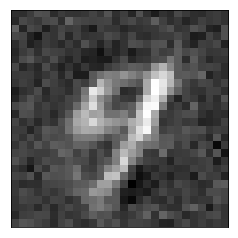

Epoch: 5, Batch: 500, Error D: 0.3107297122478485, Error G: 3.2567853927612305


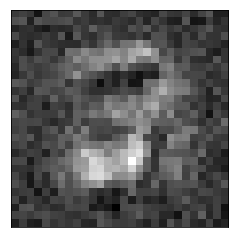

Epoch: 6, Batch: 0, Error D: 0.33265256881713867, Error G: 4.326235771179199


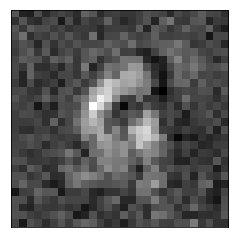

Epoch: 6, Batch: 500, Error D: 0.49624893069267273, Error G: 4.70477294921875


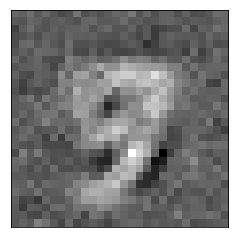

Epoch: 7, Batch: 0, Error D: 0.5209382176399231, Error G: 4.617907524108887


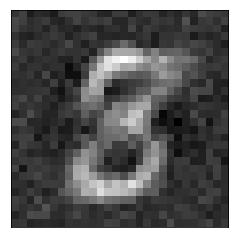

Epoch: 7, Batch: 500, Error D: 0.43661415576934814, Error G: 4.578525543212891


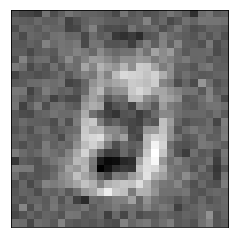

Epoch: 8, Batch: 0, Error D: 0.3835148215293884, Error G: 3.5000948905944824


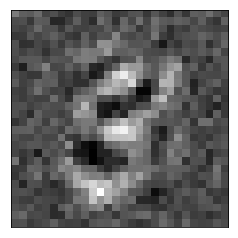

Epoch: 8, Batch: 500, Error D: 0.49797195196151733, Error G: 3.0147266387939453


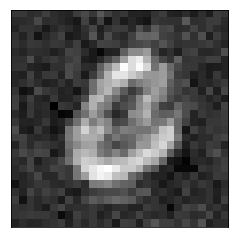

Epoch: 9, Batch: 0, Error D: 0.5862435698509216, Error G: 2.514057159423828


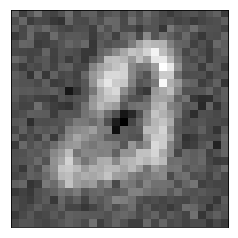

Epoch: 9, Batch: 500, Error D: 0.6014596223831177, Error G: 2.8160898685455322


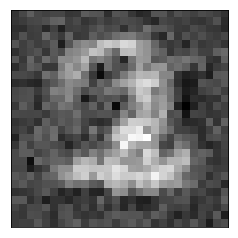

Epoch: 10, Batch: 0, Error D: 0.5227433443069458, Error G: 2.785640001296997


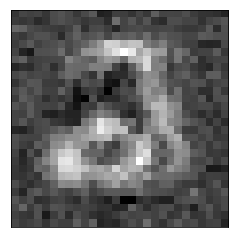

Epoch: 10, Batch: 500, Error D: 0.6596181392669678, Error G: 2.085066556930542


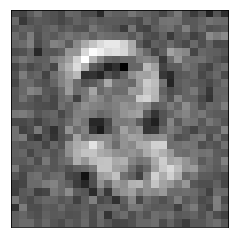

Epoch: 11, Batch: 0, Error D: 0.5430829524993896, Error G: 3.095409631729126


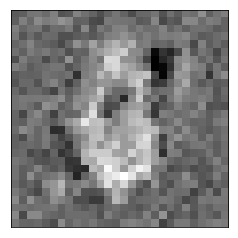

Epoch: 11, Batch: 500, Error D: 0.875658392906189, Error G: 2.7878503799438477


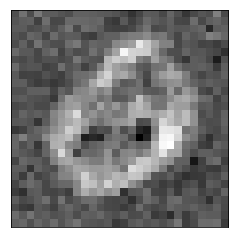

Epoch: 12, Batch: 0, Error D: 0.6133257746696472, Error G: 2.6500988006591797


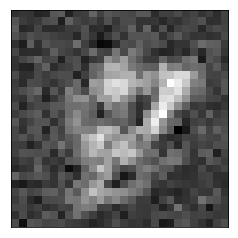

Epoch: 12, Batch: 500, Error D: 0.5731082558631897, Error G: 2.233398675918579


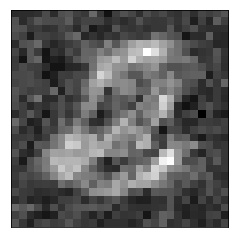

Epoch: 13, Batch: 0, Error D: 0.5222264528274536, Error G: 2.2846386432647705


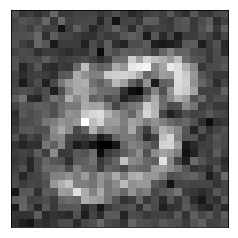

Epoch: 13, Batch: 500, Error D: 0.7804341912269592, Error G: 2.0891671180725098


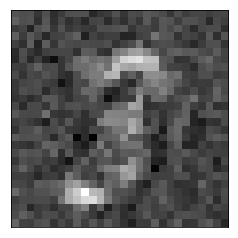

Epoch: 14, Batch: 0, Error D: 0.5480718612670898, Error G: 2.6996874809265137


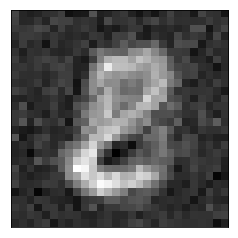

Epoch: 14, Batch: 500, Error D: 0.6016818881034851, Error G: 2.4452385902404785


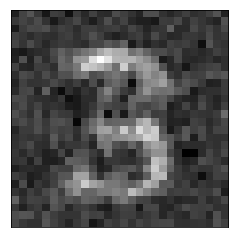

Epoch: 15, Batch: 0, Error D: 0.7169704437255859, Error G: 2.410141944885254


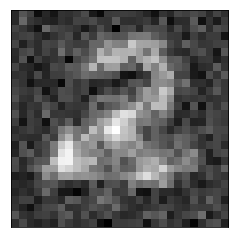

Epoch: 15, Batch: 500, Error D: 0.7178243398666382, Error G: 2.4082283973693848


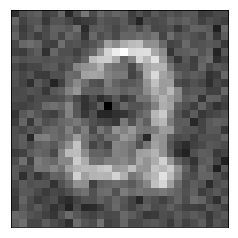

Epoch: 16, Batch: 0, Error D: 0.726662278175354, Error G: 1.782008171081543


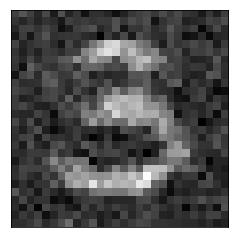

Epoch: 16, Batch: 500, Error D: 0.6913634538650513, Error G: 2.0374948978424072


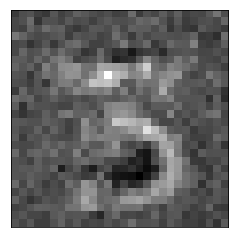

Epoch: 17, Batch: 0, Error D: 0.6620819568634033, Error G: 2.419494152069092


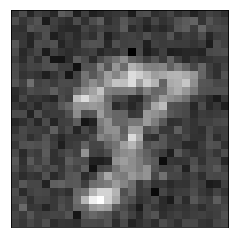

Epoch: 17, Batch: 500, Error D: 0.6368703842163086, Error G: 2.3120081424713135


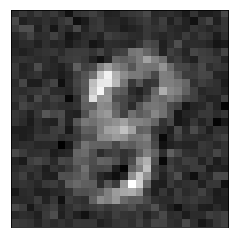

Epoch: 18, Batch: 0, Error D: 1.0073965787887573, Error G: 2.208848476409912


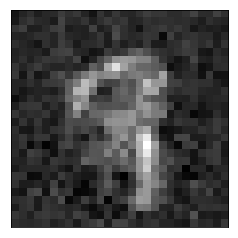

Epoch: 18, Batch: 500, Error D: 0.5986905097961426, Error G: 2.86362361907959


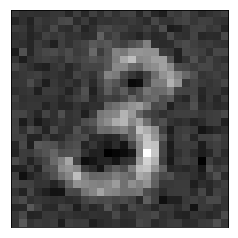

Epoch: 19, Batch: 0, Error D: 0.6297651529312134, Error G: 2.546051502227783


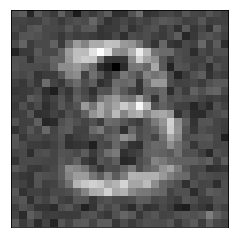

Epoch: 19, Batch: 500, Error D: 0.7222439050674438, Error G: 2.419201135635376


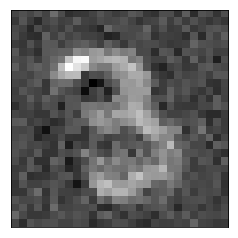

Epoch: 20, Batch: 0, Error D: 0.6298494338989258, Error G: 2.7913379669189453


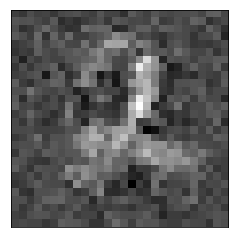

Epoch: 20, Batch: 500, Error D: 0.5750642418861389, Error G: 2.5908501148223877


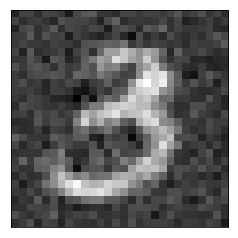

Epoch: 21, Batch: 0, Error D: 0.6981134414672852, Error G: 3.0459933280944824


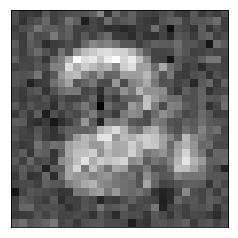

Epoch: 21, Batch: 500, Error D: 0.6584916114807129, Error G: 2.247340202331543


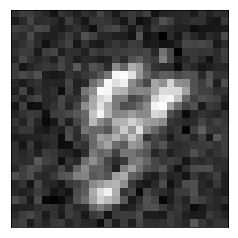

Epoch: 22, Batch: 0, Error D: 0.6920044422149658, Error G: 2.4458510875701904


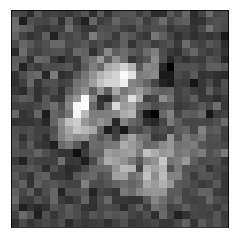

Epoch: 22, Batch: 500, Error D: 0.5805072784423828, Error G: 2.55666184425354


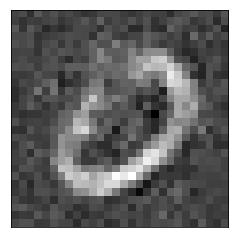

Epoch: 23, Batch: 0, Error D: 0.5016701221466064, Error G: 2.2422397136688232


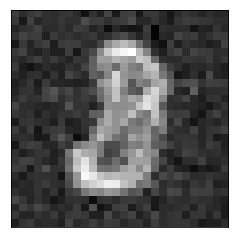

Epoch: 23, Batch: 500, Error D: 0.639472484588623, Error G: 2.6261255741119385


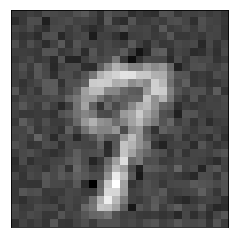

Epoch: 24, Batch: 0, Error D: 0.6227951645851135, Error G: 1.8855681419372559


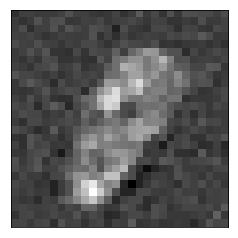

Epoch: 24, Batch: 500, Error D: 0.587397575378418, Error G: 2.5783801078796387


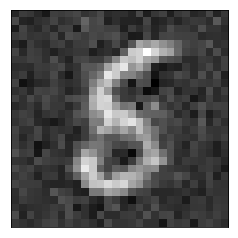

In [64]:
# The code below handles the training of the GAN

# Total number of epochs to train
n_epochs = 25 # start with one epoch (you will want to increase this number)

# Loop over epochs
for epoch in range(n_epochs):
    
    # Loop over training examples
    examples = enumerate(train_loader)
    for i_batch, (real_batch, _) in examples:

        # Batch size
        N = real_batch.size(0)
        
        # First Train Discriminator
        real_data = torch.autograd.Variable(images_to_vectors(real_batch))

        # Generate fake data
        # (detach avoid calculating gradients for generator when training discriminator)
        fake_data = generator(noise(N)).detach()

        # Reset gradient
        d_optimizer.zero_grad()
    
        # Train discriminator on real data
        prediction_real = discriminator(real_data)

        # Calculate error and backpropagate
        # We want the discriminator to report "1" for real images
        ones = torch.autograd.Variable(torch.ones(N, 1))
        error_real = loss(prediction_real, ones)
        error_real.backward()

        # Train discriminator on fake data
        prediction_fake = discriminator(fake_data)
        
        # Calculate error and backpropagate
        # We want the discriminator to report "0" for fake images
        zeros =  torch.autograd.Variable(torch.zeros(N, 1))
        error_fake = loss(prediction_fake, zeros)
        error_fake.backward()

        # Update weights with gradients
        d_optimizer.step()

        # Total discriminator error
        d_error =  error_real + error_fake

        # Train Generator
        # Generate fake data
        fake_data = generator(noise(N))

        # Reset gradients
        g_optimizer.zero_grad()

        # Sample noise and generate fake data
        prediction = discriminator(fake_data)

        # Calculate error and backpropagate
        # instead of maximising the loss for zeros we minimise the loss for ones
        ones = torch.autograd.Variable(torch.ones(N, 1))
        g_error = loss(prediction, ones)
        g_error.backward()

        # Update weights with gradients
        g_optimizer.step()

        # Show status every few batches
        if (i_batch) % 500 == 0: 
                        
            test_images = vectors_to_images(generator(noise(1)))
            test_images = test_images.data
            print("Epoch: {0}, Batch: {1}, Error D: {2}, Error G: {3}".format(epoch,i_batch,d_error,g_error))
            draw_image(test_images[0][0])
                


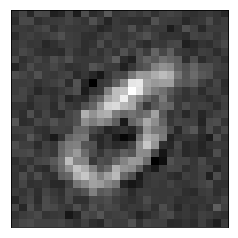

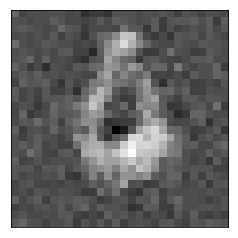

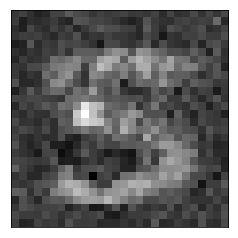

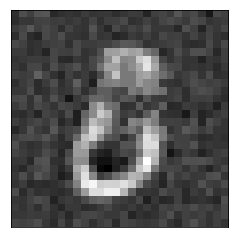

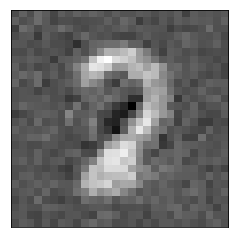

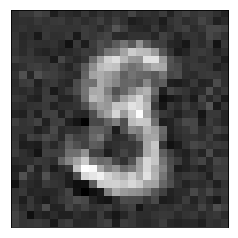

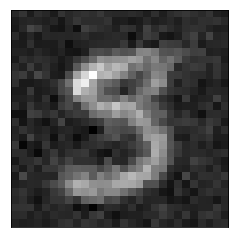

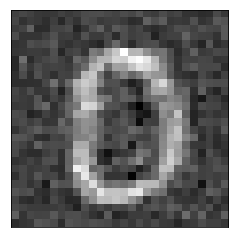

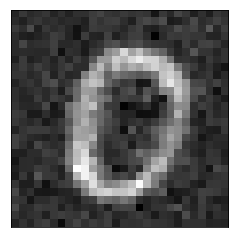

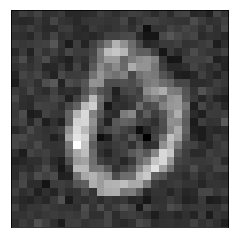

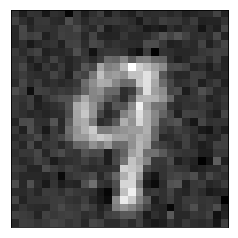

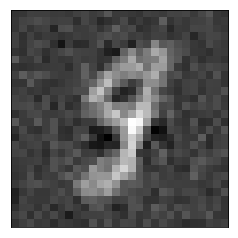

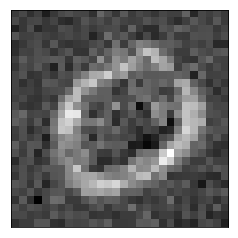

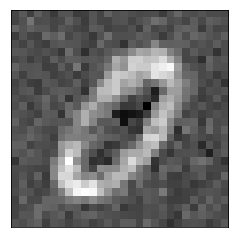

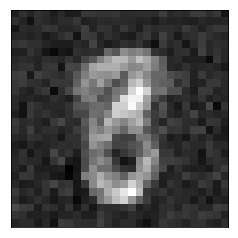

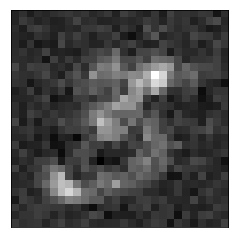

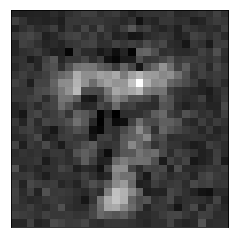

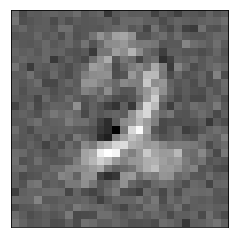

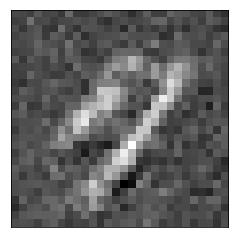

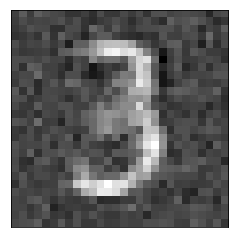

In [66]:
# Produce 20 examples

test_images = vectors_to_images(generator(noise(20)))
test_images = test_images.data
for i in range(20):
    draw_image(test_images[i][0])